In [76]:
#Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import time
import requests
import pandas as pd
from scipy.stats import linregress
from numpy.polynomial.polynomial import polyfit

#API Keys
from api_keys import weather_api_key, g_key

#Citipy
from citipy import citipy

#CSV file
output_data_file = "output_data/cities.csv"

#Lat & Long
lat_range = (-90, 90)
lng_range = (-180, 180)

In [32]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        
#Print cities
len(cities)

626

In [33]:
#Create lists
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [50]:
#API Calls
from pprint import pprint
print("Beginning of API Call")
print("---------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
for idx, each_city in enumerate(cities): 
    print(f'Fetching {idx} out of {len(cities)}')
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q={each_city}"
    try: 
        response=requests.get(query_url)
        data=response.json()
        city_name=each_city
        cloudiness=data['clouds']['all']
        country=data['sys']['country']
        date=data['dt']
        humidity=data['main']['humidity']
        lat=data['coord']['lat']
        lon=data['coord']['lon']
        max_temp=data['main']['temp_max']
        wind_speed=data['wind']['speed']
    except: 
        print('error somewhere')
        next
    city_name_list.append(city_name)
    cloudiness_list.append(cloudiness)
    country_list.append(country)
    date_list.append(date)
    humidity_list.append(humidity)
    lat_list.append(lat)
    lng_list.append(lon)
    max_temp_list.append(max_temp)
    wind_speed_list.append(wind_speed)
print("------------------")
print("API Call Complete")

Beginning of API Call
---------------------
Fetching 0 out of 626
Fetching 1 out of 626
Fetching 2 out of 626
Fetching 3 out of 626
Fetching 4 out of 626
Fetching 5 out of 626
Fetching 6 out of 626
Fetching 7 out of 626
Fetching 8 out of 626
Fetching 9 out of 626
Fetching 10 out of 626
Fetching 11 out of 626
Fetching 12 out of 626
error somewhere
Fetching 13 out of 626
Fetching 14 out of 626
Fetching 15 out of 626
Fetching 16 out of 626
Fetching 17 out of 626
error somewhere
Fetching 18 out of 626
Fetching 19 out of 626
error somewhere
Fetching 20 out of 626
Fetching 21 out of 626
Fetching 22 out of 626
Fetching 23 out of 626
Fetching 24 out of 626
Fetching 25 out of 626
Fetching 26 out of 626
Fetching 27 out of 626
Fetching 28 out of 626
Fetching 29 out of 626
error somewhere
Fetching 30 out of 626
Fetching 31 out of 626
Fetching 32 out of 626
Fetching 33 out of 626
Fetching 34 out of 626
Fetching 35 out of 626
Fetching 36 out of 626
Fetching 37 out of 626
Fetching 38 out of 626
Fetch

Fetching 327 out of 626
error somewhere
Fetching 328 out of 626
Fetching 329 out of 626
Fetching 330 out of 626
Fetching 331 out of 626
Fetching 332 out of 626
Fetching 333 out of 626
Fetching 334 out of 626
Fetching 335 out of 626
Fetching 336 out of 626
Fetching 337 out of 626
Fetching 338 out of 626
Fetching 339 out of 626
Fetching 340 out of 626
Fetching 341 out of 626
error somewhere
Fetching 342 out of 626
Fetching 343 out of 626
Fetching 344 out of 626
Fetching 345 out of 626
Fetching 346 out of 626
Fetching 347 out of 626
Fetching 348 out of 626
Fetching 349 out of 626
Fetching 350 out of 626
Fetching 351 out of 626
Fetching 352 out of 626
Fetching 353 out of 626
Fetching 354 out of 626
Fetching 355 out of 626
Fetching 356 out of 626
Fetching 357 out of 626
error somewhere
Fetching 358 out of 626
Fetching 359 out of 626
Fetching 360 out of 626
Fetching 361 out of 626
Fetching 362 out of 626
Fetching 363 out of 626
Fetching 364 out of 626
Fetching 365 out of 626
Fetching 366 out

In [56]:
#Convert Data to DF
Climate_dict = {
    "City" : city_name_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list, 
    "Country" : country_list,
    "Date" : date_list,
}
df=pd.DataFrame(Climate_dict)

In [58]:
#Count
df.count()

City          639
Lat           639
Lng           639
Max Temp      639
Humidity      639
Cloudiness    639
Wind Speed    639
Country       639
Date          639
dtype: int64

In [59]:
#Display DF
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nemuro,43.32,145.57,33.80,64,75,5.82,JP,1606106515
1,nemuro,43.32,145.57,33.80,64,75,5.82,JP,1606106506
2,bulungu,-4.55,18.60,71.28,94,98,1.19,CD,1606106630
3,kapaa,22.08,-159.32,75.99,78,90,16.11,US,1606106370
4,ushuaia,-54.80,-68.30,44.60,70,20,4.70,AR,1606106630
...,...,...,...,...,...,...,...,...,...
634,gat,31.61,34.76,60.01,87,0,2.24,IL,1606106637
635,caucaia,-3.74,-38.65,81.00,78,40,12.75,BR,1606106828
636,bom jesus,-9.07,-44.36,70.75,93,100,2.10,BR,1606106828
637,kahului,20.89,-156.47,77.00,78,40,20.80,US,1606106795


In [61]:
#Export data to CSV
df.to_csv("output_data/cities.csv", index = False)

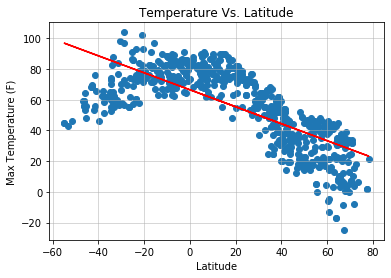

In [86]:
# Temp Vs. Lat
plt.scatter(df["Lat"], df["Max Temp"])

# Set title
plt.title("Temperature Vs. Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

b, m = polyfit(df["Lat"], df["Max Temp"], 1)

#plt.plot(x, y, '.')
plt.plot(df["Lat"], b + m * df["Lat"], '-', color="red")
plt.show()

#Save png
#plt.savefig("Temp vs Lat.png")

In [ ]:
#The lowest latitude has the highest temperature. 

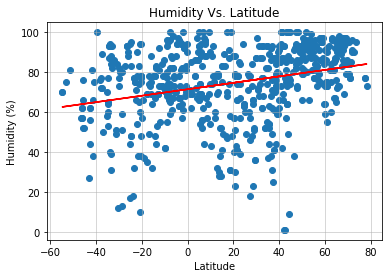

In [84]:
# Humidity Vs. Lat
plt.scatter(df["Lat"], df["Humidity"])

# Set title
plt.title("Humidity Vs. Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

b, m = polyfit(df["Lat"], df["Humidity"], 1)

#plt.plot(x, y, '.')
plt.plot(df["Lat"], b + m * df["Lat"], '-', color="red")
plt.show()

#Save png
#plt.savefig("Humidity Vs Lat.png")

In [ ]:
#Lowest % of humidity is found towards the higher latitudes.

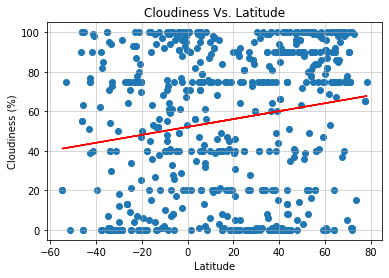

In [87]:
# Cloudiness Vs. Lat
plt.scatter(df["Lat"], df["Cloudiness"])

# Set title
plt.title("Cloudiness Vs. Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

b, m = polyfit(df["Lat"], df["Cloudiness"], 1)

#plt.plot(x, y, '.')
plt.plot(df["Lat"], b + m * df["Lat"], '-', color="red")
plt.show()

#Save png
#plt.savefig("Cloudiness Vs Lat.png")

In [ ]:
#Cloudiness varies across all latitudes. 

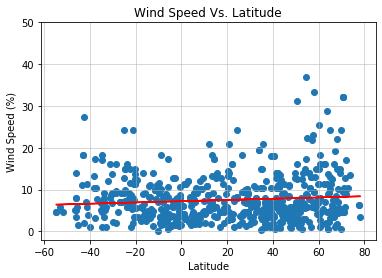

In [82]:
# Windspeed Vs. Lat
plt.scatter(df["Lat"], df["Wind Speed"])
plt.title("Wind Speed Vs. Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

b, m = polyfit(df["Lat"], df["Wind Speed"], 1)

#plt.plot(x, y, '.')
plt.plot(df["Lat"], b + m * df["Lat"], '-', color="red")
plt.show()

#Save png
#plt.savefig("Windspeed Vs Lat.png")

In [ ]:
#It is the windiest at the higher latitudes. 